In [643]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [644]:
train=pd.read_csv('Train_Set.csv')
test=pd.read_csv('Test_Set.csv')

In [645]:
train.shape,test.shape

((126363, 28), (54156, 27))

# Null

In [646]:
test.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 1460
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              2174
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         1304
ProductWeight          307
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       3896
Session_Ordered       2031
WeekdayOrder             0
dtype: int64

In [647]:
train.isna().sum()

OrderId                  0
Customer_Id              0
Customer_Category        0
Cust_State               0
Zipcode                  0
Sales                 3614
Order_zone               0
Price                    0
CategoryName             0
Transcation              0
Dept_Id                  0
Dept_Name                0
Profit_Ratio             0
Discount              5050
Quantity                 0
Order_Profit             0
Product_type             0
Prod_Category_Id         0
ProductLength         2946
ProductWeight          695
Dispatched               0
Shipping_Class           0
Scheduled_Shipping       0
Warehouse_Region         0
Delivery_Review       9065
Session_Ordered       4792
WeekdayOrder             0
Delivery_Status          0
dtype: int64

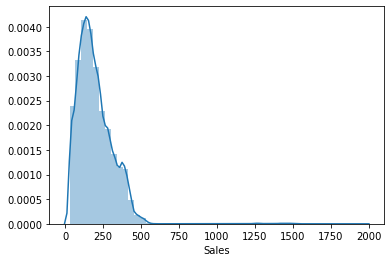

In [648]:
sns.distplot(train['Sales'])

In [649]:
train['Sales'].median(),train['Sales'].mean()

(173.0, 196.11995209736943)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text major ticklabel objects>)

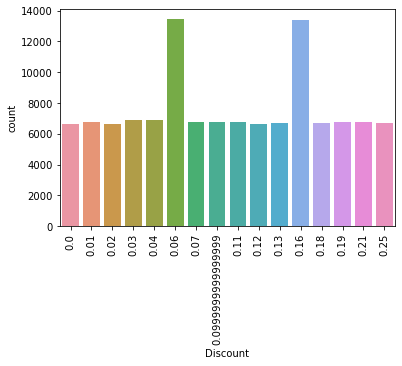

In [650]:
sns.countplot(train['Discount'])
plt.xticks(rotation='vertical')

In [651]:
train['Discount'].median()

0.0999999999999999

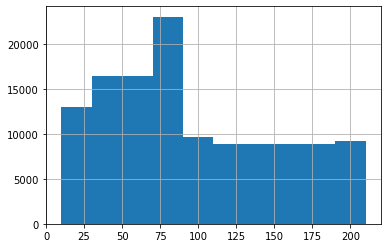

In [652]:
train['ProductLength'].hist()

In [653]:
train['ProductLength'].median(),train['ProductLength'].mean()

(84.0, 95.97617832227327)

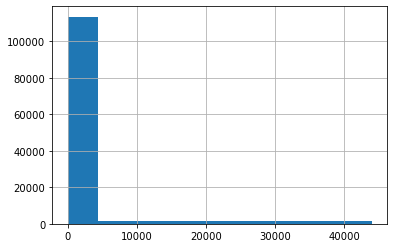

In [654]:
train['ProductWeight'].hist()

In [655]:
train['ProductWeight'].median(),train['ProductLength'].mean()

(1640.0, 95.97617832227327)

(113462,)


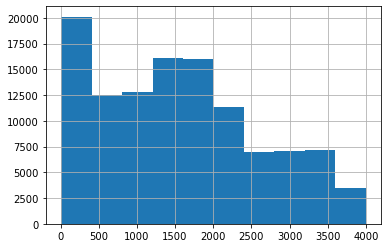

In [656]:
print(train[train['ProductWeight']<4000]['ProductWeight'].shape)
train[train['ProductWeight']<4000]['ProductWeight'].hist()

In [657]:
train[train['ProductWeight']<4000]['ProductWeight'].mean(),train[train['ProductWeight']<4000]['ProductWeight'].median()

(1565.1498563395674, 1489.0)

In [658]:
train['Delivery_Review'].value_counts()

4.0    42860
3.0    41201
2.0    19732
5.0    11640
1.0     1865
Name: Delivery_Review, dtype: int64

In [659]:
train['Delivery_Review'].median()

3.0

In [660]:
print(train['Session_Ordered'].mean(),train['Session_Ordered'].median())
train['Session_Ordered'].value_counts()

2.00149706755723 2.0


2.0    40873
3.0    40440
1.0    40258
Name: Session_Ordered, dtype: int64

In [661]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(strategy='median',missing_values=np.nan)

In [662]:
SI.fit(train[['Session_Ordered']])
train['Session_Ordered']=SI.transform(train[['Session_Ordered']])
test['Session_Ordered']=SI.transform(test[['Session_Ordered']])

In [663]:
SI.fit(train[['Delivery_Review']])
train['Delivery_Review']=SI.transform(train[['Delivery_Review']])
test['Delivery_Review']=SI.transform(test[['Delivery_Review']])

In [664]:
SI.fit(train[['ProductWeight']])
train['ProductWeight']=SI.transform(train[['ProductWeight']])
test['ProductWeight']=SI.transform(test[['ProductWeight']])

In [665]:
SI=SimpleImputer(strategy='median',missing_values=np.nan)
SI.fit(train[['ProductLength']])
train['ProductLength']=SI.transform(train[['ProductLength']])
test['ProductLength']=SI.transform(test[['ProductLength']])

In [666]:
SI.fit(train[['Sales']])
train['Sales']=SI.transform(train[['Sales']])
test['Sales']=SI.transform(test[['Sales']])

In [667]:
SI=SimpleImputer(strategy='median',missing_values=np.nan)
SI.fit(train[['Discount']])
train['Discount']=SI.transform(train[['Discount']])
test['Discount']=SI.transform(test[['Discount']])

In [668]:
train.isna().sum()

OrderId               0
Customer_Id           0
Customer_Category     0
Cust_State            0
Zipcode               0
Sales                 0
Order_zone            0
Price                 0
CategoryName          0
Transcation           0
Dept_Id               0
Dept_Name             0
Profit_Ratio          0
Discount              0
Quantity              0
Order_Profit          0
Product_type          0
Prod_Category_Id      0
ProductLength         0
ProductWeight         0
Dispatched            0
Shipping_Class        0
Scheduled_Shipping    0
Warehouse_Region      0
Delivery_Review       0
Session_Ordered       0
WeekdayOrder          0
Delivery_Status       0
dtype: int64

#### Outlier & Scaling

In [669]:
(train['Discount']*100).value_counts()

6.0     13450
16.0    13411
10.0    11847
3.0      6882
4.0      6873
21.0     6798
1.0      6787
7.0      6762
11.0     6754
19.0     6734
18.0     6733
13.0     6702
25.0     6698
2.0      6668
12.0     6636
0.0      6628
Name: Discount, dtype: int64

In [670]:
(test['Discount']*100).value_counts()

6.0     5819
16.0    5785
10.0    4984
0.0     3016
12.0    2987
2.0     2958
13.0    2917
18.0    2910
19.0    2908
25.0    2889
11.0    2866
21.0    2853
7.0     2852
1.0     2833
3.0     2810
4.0     2769
Name: Discount, dtype: int64

In [671]:
train['Discount']=train['Discount']*100
test['Discount']=test['Discount']*100

In [672]:
train['Sales']=np.round(train['Sales'])
test['Sales']=np.round(test['Sales'])

In [673]:
num=train[['Sales','Price','Profit_Ratio','Order_Profit ','ProductLength','ProductWeight']].copy(deep=True)
test_num=test[num.columns].copy(deep=True)

In [674]:
num.head()

,Sales,Price,Profit_Ratio,Order_Profit,ProductLength,ProductWeight
0,150.0,4383.39,0.08,352.78,191.0,1592.0
1,165.0,4295.72,0.47,2018.10,79.0,1420.0
2,171.0,3616.65,0.26,939.63,67.0,1231.0
3,132.0,9175.86,0.48,4401.74,45.0,1640.0
4,173.0,2779.29,0.13,361.70,43.0,1018.0


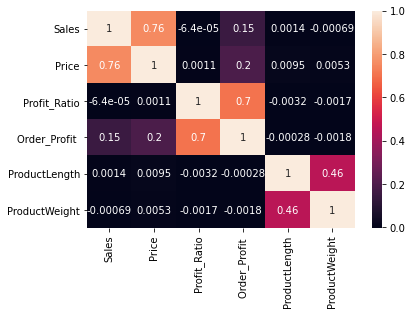

In [675]:
sns.heatmap(num.corr(),annot=True)

In [676]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductLength',
       'ProductWeight'],
      dtype='object')

In [677]:
num.skew()

Sales            2.793369
Price            3.171663
Profit_Ratio    -2.870356
Order_Profit    -4.946131
ProductLength    0.455014
ProductWeight    3.575051
dtype: float64

In [678]:
np.log(num).skew()

Sales           -0.534220
Price            0.321208
Profit_Ratio          NaN
Order_Profit    -1.316721
ProductLength   -0.707207
ProductWeight    0.113135
dtype: float64

In [679]:
np.cbrt(num).skew()

Sales            0.141182
Price            0.825265
Profit_Ratio    -1.608958
Order_Profit    -1.399795
ProductLength   -0.234591
ProductWeight    1.883932
dtype: float64

In [680]:
np.sqrt(num).skew()

Sales            0.557188
Price            1.138023
Profit_Ratio    -0.962066
Order_Profit     1.166158
ProductLength   -0.032962
ProductWeight    2.524735
dtype: float64

In [681]:
num['Order_Profit ']=np.cbrt(num['Order_Profit '])

In [682]:
num[['Sales']]=np.cbrt(num[['Sales']])
num[['Price','ProductWeight']]=np.log(num[['Price','ProductWeight']])
num[['ProductLength']]=np.sqrt(num[['ProductLength']])

In [683]:

test_num[['Order_Profit ']]=np.cbrt(test_num[['Order_Profit ']])
test_num[['Sales']]=np.cbrt(test_num[['Sales']])
test_num[['Price','ProductWeight']]=np.log(test_num[['Price','ProductWeight']])
test_num[['ProductLength']]=np.sqrt(test_num[['ProductLength']])

#### CAT NUMERIC Transform

In [684]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductLength',
       'ProductWeight'],
      dtype='object')

In [685]:
cat=train.drop(num.columns,axis=1)
cat=cat.drop(['OrderId','Delivery_Status'],axis=1)
cat.head()

,Customer_Id,Customer_Category,Cust_State,Zipcode,Order_zone,CategoryName,Transcation,Dept_Id,Dept_Name,Discount,Quantity,Product_type,Prod_Category_Id,Dispatched,Shipping_Class,Scheduled_Shipping,Warehouse_Region,Delivery_Review,Session_Ordered,WeekdayOrder
0,12386,Consumer,AR,19120,Central,Cat-2,UPI,4,Apparel,10.0,3,Fragile,17,0,Standard,4,NORTH,5.0,2.0,0
1,2630,Consumer,BR,2907,East,Cat-2,UPI,4,Apparel,16.0,3,Fragile,17,0,Standard,6,NORTH,2.0,2.0,1
2,1752,Corporate,RJ,90214,South,Cat-50,Cash,7,Fan Shop,7.0,4,Not Fragile,46,0,Standard,6,SOUTH,4.0,2.0,0
3,9268,Consumer,UP,745,East,Cat-12,Credit,4,Apparel,18.0,1,Not Fragile,18,1,2A,4,NORTH,4.0,3.0,1
4,2888,Corporate,UP,92427,North,Cat-3,UPI,5,Golf,16.0,4,Not Fragile,29,1,Standard,5,CENTRAL,2.0,1.0,0


In [686]:
test_cat=test.drop(test_num.columns,axis=1)
test_cat=test_cat.drop(['OrderId'],axis=1)
#test_cat.head()

In [687]:
y=train['Delivery_Status']

## 1---------------------------------------------------------------------------------------------------

In [688]:
z=pd.DataFrame(train['Customer_Id'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in train['Customer_Id']:
    m=z.loc[i]['Customer_Id']
    if m<3:
        new.append('G1')
    elif m>=3 and m<6:
        new.append('G2')
    elif m>=6 and m<8:
        new.append('G3')
    elif m>=8 and m<10:
        new.append('G4')
    elif m>=10 and m<12:
        new.append('G5')
    elif m>=12 and m<14:
        new.append('G6')
    elif m>=15 and m<18:
        new.append('G7')
    elif m>=18 and m<21:
        new.append('G8')
    else:
        new.append('G9')

In [689]:
pd.Series(new).value_counts()

G5    28557
G4    25178
G6    23850
G3    14275
G7    12393
G9     8961
G2     5552
G1     5094
G8     2503
dtype: int64

In [690]:
cat['Customer_Id']=new


In [691]:
new=[]
for i in test['Customer_Id']:
    if i in z.index:
        m=z.loc[i]['Customer_Id']
        if m<3:
            new.append('G1')
        elif m>=3 and m<6:
            new.append('G2')
        elif m>=6 and m<8:
            new.append('G3')
        elif m>=8 and m<10:
            new.append('G4')
        elif m>=10 and m<12:
            new.append('G5')
        elif m>=12 and m<14:
            new.append('G6')
        elif m>=15 and m<18:
            new.append('G7')
        elif m>=18 and m<21:
            new.append('G8')
        else:
            new.append('G9')
    else:
        new.append('G8')

In [692]:
test_cat['Customer_Id']=new


## 2----------------------------------------------------------------------

In [693]:
z=pd.DataFrame(train['Zipcode'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in train['Zipcode']:
    m=z.loc[i]['Zipcode']
    if m<4:
        new.append('G1')
    elif m>=4 and m<6:
        new.append('G2')
    elif m>=6 and m<10:
        new.append('G3')
    elif m>=10 and m<13:
        new.append('G4')
    elif m>=13 and m<16:
        new.append('G5')
    elif m>=16 and m<19:
        new.append('G6')
    elif m>=19 and m<22:
        new.append('G7')
    else:
        new.append('G8')

In [694]:
cat['Zipcode']=new

In [695]:
new=[]
for i in test['Zipcode']:
    if i in z.index:
        m=z.loc[i]['Zipcode']
        if m<4:
            new.append('G1')
        elif m>=4 and m<6:
            new.append('G2')
        elif m>=6 and m<10:
            new.append('G3')
        elif m>=10 and m<13:
            new.append('G4')
        elif m>=13 and m<16:
            new.append('G5')
        elif m>=16 and m<19:
            new.append('G6')
        elif m>=19 and m<22:
            new.append('G7')
        else:
            new.append('G8')
    else:
        new.append('G5')

In [696]:

test_cat['Zipcode']=new


## 3---------------------------------------------------------------------------------

In [697]:
train['CategoryName'].value_counts()

Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-14      304
Cat-6       304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-47      202
Cat-25      202
Cat-35      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64

In [698]:
z=train['CategoryName'].value_counts()
idx=z[z>1000].index
idx

Index(['Cat-2', 'Cat-12', 'Cat-4', 'Cat-50', 'Cat-32', 'Cat-49', 'Cat-13',
       'Cat-7', 'Cat-3', 'Cat-5', 'Cat-20', 'Cat-27'],
      dtype='object')

In [699]:
z=pd.DataFrame(train['CategoryName'].value_counts())
#mapping zip codes
#print(z)
new=[]
for i in train['CategoryName']:
    if i in idx:
        new.append(i)
    else:
        
        m=z.loc[i]['CategoryName']
        if m<=250:
            new.append('Cat-OthersI')
        elif m>250 and m<=400:
            new.append('Cat-OthersII')
        elif m>400 and m<=600:
            new.append('Cat-OthersIII')
        elif m>600 and m<1000:
            new.append('Cat-OthersIV')
        else:
            continue

In [700]:
cat['CategoryName']=new

In [701]:
pd.Series(new).value_counts()

Cat-2            17297
Cat-12           15489
Cat-4            14762
Cat-50           13551
Cat-32           12223
Cat-49           10810
Cat-13            9564
Cat-7             8735
Cat-3             7593
Cat-OthersII      4763
Cat-OthersIV      2929
Cat-5             2203
Cat-OthersIII     2176
Cat-OthersI       2020
Cat-20            1232
Cat-27            1016
dtype: int64

In [702]:
new=[]
for i in test['CategoryName']:
    if i in idx:
        new.append(i)
    else:
        
        m=z.loc[i]['CategoryName']
        if m<=250:
            new.append('Cat-OthersI')
        elif m>250 and m<=400:
            new.append('Cat-OthersII')
        elif m>400 and m<=600:
            new.append('Cat-OthersIII')
        elif m>600 and m<1000:
            new.append('Cat-OthersIV')
        else:
            continue

In [703]:
test_cat['CategoryName']=new


## 4---------------------------------------------------------------------------------------

In [704]:
train['CategoryName'].value_counts()

Cat-2     17297
Cat-12    15489
Cat-4     14762
Cat-50    13551
Cat-32    12223
Cat-49    10810
Cat-13     9564
Cat-7      8735
Cat-3      7593
Cat-5      2203
Cat-20     1232
Cat-27     1016
Cat-19      854
Cat-42      799
Cat-8       667
Cat-41      609
Cat-11      458
Cat-21      448
Cat-29      447
Cat-37      418
Cat-15      405
Cat-48      375
Cat-44      365
Cat-22      358
Cat-36      345
Cat-38      336
Cat-34      335
Cat-45      317
Cat-10      311
Cat-40      309
Cat-16      305
Cat-14      304
Cat-6       304
Cat-33      272
Cat-1       265
Cat-9       262
Cat-39      243
Cat-30      230
Cat-24      222
Cat-47      202
Cat-25      202
Cat-35      202
Cat-23      152
Cat-31      137
Cat-46      124
Cat-18       92
Cat-28       82
Cat-17       51
Cat-43       41
Cat-26       40
Name: CategoryName, dtype: int64

In [705]:
cat['Prod_Category_Id'].value_counts()

17    17297
18    15489
24    14762
46    13551
45    12223
48    10810
43     9564
9      8735
29     7593
37     1424
40     1232
36     1016
26      854
35      799
13      779
41      667
75      609
3       458
76      448
63      447
7       418
62      405
74      375
33      365
66      358
68      345
72      336
67      335
32      317
44      311
71      309
64      305
65      304
12      304
59      272
73      265
38      262
69      243
5       230
6       222
61      202
11      202
30      202
70      152
60      137
31      124
2        92
10       82
4        51
34       41
16       40
Name: Prod_Category_Id, dtype: int64

## ---------------------------------------------------------------------------------------

In [706]:
test_cat.shape,cat.shape

((54156, 20), (126363, 20))

In [707]:
test_cat=test_cat[test_cat.columns].astype('object')
pd.get_dummies(test_cat,drop_first=True).shape

(54156, 166)

In [708]:
cat=cat[cat.columns].astype('object')
pd.get_dummies(cat,drop_first=True).shape

(126363, 166)

In [709]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [710]:
num.shape,test_num.shape

((126363, 6), (54156, 6))

In [711]:
scaler.fit(num)


numScaler=pd.DataFrame(scaler.transform(num),
                       columns=num.columns)
test_numScaler=pd.DataFrame(scaler.transform(test_num),
                            columns=num.columns)

In [712]:
num.columns

Index(['Sales', 'Price', 'Profit_Ratio', 'Order_Profit ', 'ProductLength',
       'ProductWeight'],
      dtype='object')

In [713]:
dum=pd.get_dummies(cat)
test_dum=pd.get_dummies(test_cat)

In [714]:
X=pd.concat([dum,numScaler],axis=1)
test_X=pd.concat([test_dum,test_numScaler],axis=1)
X.shape,test_X.shape

((126363, 192), (54156, 192))

# -----------------------------------------------------------------------------------------------------------------

In [715]:
y.value_counts()

0    84912
1    41451
Name: Delivery_Status, dtype: int64

### Imbalanced Data

In [716]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy=1,k_neighbors=3,n_jobs=-1)

In [717]:
X0,y0=sm.fit_resample(X,y)

In [718]:
y0.value_counts(),y.value_counts()

(0    84912
 1    84912
 Name: Delivery_Status, dtype: int64,
 0    84912
 1    41451
 Name: Delivery_Status, dtype: int64)

### Model

In [443]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [719]:
X_train,X_test,y_train,y_test=train_test_split(X0,y0,test_size=.25)

In [108]:
y_test.value_counts()

1    25488
0    25460
Name: Delivery_Status, dtype: int64

# 1

In [98]:
Dt=DecisionTreeClassifier()
Dt.fit(X_train,y_train)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.79      0.79      0.79     17047
           1       0.78      0.79      0.79     16578

    accuracy                           0.79     33625
   macro avg       0.79      0.79      0.79     33625
weighted avg       0.79      0.79      0.79     33625

[[13455  3592]
 [ 3531 13047]]


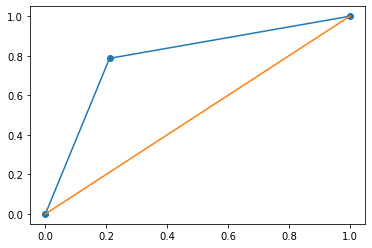

In [99]:
pred_train=Dt.predict(X_train)
pred_test=Dt.predict(X_test)
proba=Dt.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 2

              precision    recall  f1-score   support

           0       0.94      0.69      0.79     17047
           1       0.75      0.95      0.84     16578

    accuracy                           0.82     33625
   macro avg       0.84      0.82      0.81     33625
weighted avg       0.84      0.82      0.81     33625

[[11699  5348]
 [  808 15770]]


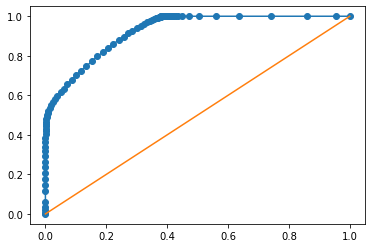

In [100]:
RF=RandomForestClassifier()
RF.fit(X_train,y_train)

pred_train=RF.predict(X_train)
pred_test=RF.predict(X_test)
proba=RF.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 3.

              precision    recall  f1-score   support

           0       0.75      0.14      0.24     17047
           1       0.52      0.95      0.67     16578

    accuracy                           0.54     33625
   macro avg       0.64      0.55      0.45     33625
weighted avg       0.64      0.54      0.45     33625

[[ 2391 14656]
 [  780 15798]]


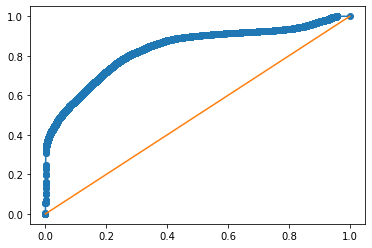

In [101]:
Nb=GaussianNB()
Nb.fit(X_train,y_train)

pred_train=Nb.predict(X_train)
pred_test=Nb.predict(X_test)
proba=Nb.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

# 4.

In [111]:
from xgboost import XGBClassifier

In [519]:
XGB=XGBClassifier(use_label_encoder=False,n_estimators=100,learning_rate=.01,gamma=.5,n_jobs=-1,verbose=3)
XGB.fit(X_train,y_train)

#pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
#proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))

#fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
#plt.plot(fpr,tpr,marker='o')
#plt.plot([0,1],[0,1])

[19:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { verbose } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[19:36:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     25540
           1       0.72      1.00      0.84     25408

    accuracy                           0.81     50948
   macro avg       0.86      0.81      0.80     50948
weighted avg       0.86      0.81

# 4.2

[20:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       1.00      0.62      0.76     21091
           1       0.73      1.00      0.84     21365

    accuracy                           0.81     42456
   macro avg       0.86      0.81      0.80     42456
weighted avg       0.86      0.81      0.80     42456

[[13062  8029]
 [   56 21309]]


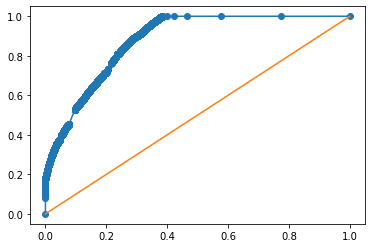

In [720]:
XGB=XGBClassifier(use_label_encoder=False,n_estimators=125,learning_rate=.01,gamma=.5)
XGB.fit(X_train,y_train)

pred_train=XGB.predict(X_train)
pred_test=XGB.predict(X_test)
proba=XGB.predict_proba(X_test)
print(metrics.classification_report(y_test,pred_test))
print(metrics.confusion_matrix(y_test,pred_test))
fpr,tpr,th=metrics.roc_curve(y_test,proba[:,1])
plt.plot(fpr,tpr,marker='o')
plt.plot([0,1],[0,1])

### ------------------------------------------------------------------------------------------------------

In [262]:
sub=pd.DataFrame(index=test['OrderId'])

In [721]:
sub['Delivery_Status']=XGB.predict(test_X)
print(sub['Delivery_Status'].value_counts())

sub.to_csv('Submission.csv')

1    31559
0    22597
Name: Delivery_Status, dtype: int64
